In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from cv2 import imshow

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
#shape of numpy array
print("x_train shape = ",x_train.shape,", x_test shape = ",x_test.shape," , y_test shape = ",y_test.shape," , y_train shape = ",y_train.shape)

x_train shape =  (60000, 28, 28) , x_test shape =  (10000, 28, 28)  , y_test shape =  (10000,)  , y_train shape =  (60000,)


x_train shape=(60000,28,28)
it means that x_train contaiins 60000 images and each image has dimension of 28x28px and all images are of greyscale
and all the images of x_train is stored in y_train
Similar for x_test and y_test

In [5]:
#printing a image from x_train
print(x_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

it is in the form of numpy array and we can later convert it into the image 

In [6]:
print(x_train[50].shape)

(28, 28)


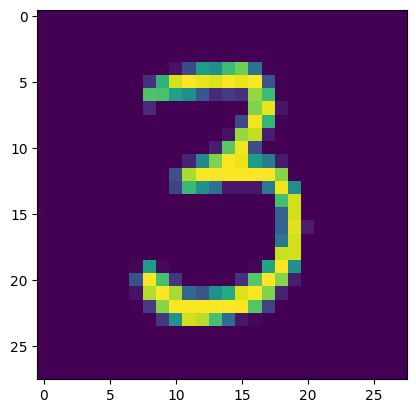

3


In [7]:
#converting the numpy array to image

plt.imshow(x_train[50])        
plt.show()

#printing the corresponding label
print(y_train[50])

In [8]:
#printing unique values in y_train

print(np.unique(y_train))


#printing unique values in y_test

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#sclaing the values  same as normalization of ML
x_train=x_train/255
x_test=x_test/255


In [10]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [11]:
#setting up the layer of the neural network

model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\bisht\anaconda3\envs\Dlprojects\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling the neural network

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#training the neural network

model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8552 - loss: 0.5036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9566 - loss: 0.1443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9690 - loss: 0.1034
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9753 - loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0661
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0547
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0395
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0354
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0302


*Training data accuracy = 99.13%

In [14]:
#evaluating the neural network

loss,accuracy=model.evaluate(x_test,y_test)

print("accuracy = ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9651 - loss: 0.1335
accuracy =  0.9678999781608582


Test data accuracy = 97.21%

In [15]:
print(x_test.shape)

(10000, 28, 28)


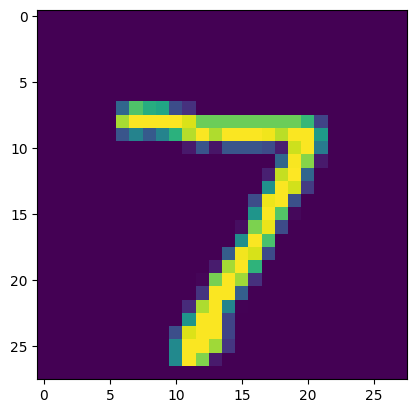

In [16]:
#first data point in x_test

plt.imshow(x_test[0])
plt.show()

In [17]:
print(y_test[0])

7


In [18]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
print(y_pred.shape)

(10000, 10)


In [20]:
print(y_pred[0])

[9.60736535e-03 5.75702325e-05 3.04861140e-04 6.64959908e-01
 1.26071091e-08 1.10621724e-04 2.56981752e-18 9.99996424e-01
 1.64462775e-02 9.92396593e-01]


model.predict() gives the prediction probability of the each class for that data point

In [21]:
#converting the prediction probabilites to class label

label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [22]:
#converting the prediction probabilites to class label for all test data points
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test -> ture labels
y_pred_labels -> predicted labels

In [23]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred_label)

print("confusion matrix :",cm)

confusion matrix : tf.Tensor(
[[ 935    0    2    4    3    7    5    8    1   15]
 [   0 1115    1    4    1    1    4    2    5    2]
 [   2    1  990   10    4    0    4   14    7    0]
 [   0    0    4  985    0    5    0    4    3    9]
 [   1    0    1    1  967    1    3    3    0    5]
 [   2    0    0   17    3  860    5    0    2    3]
 [   3    2    1    2    8    5  937    0    0    0]
 [   2    0    8    0    4    0    0  996    4   14]
 [   1    0    4   16    9    5    3    4  926    6]
 [   0    2    0    6   23    2    1    3    3  969]], shape=(10, 10), dtype=int32)


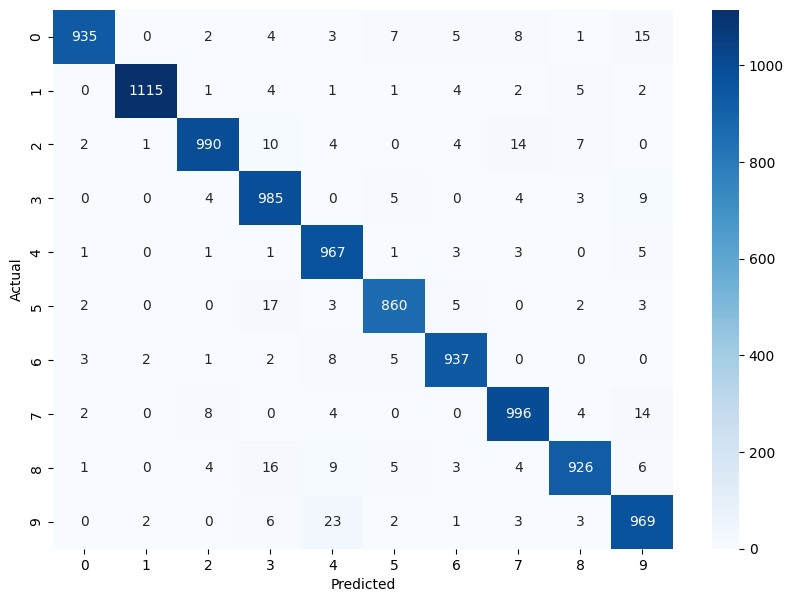

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Building the predictive system

In [25]:
input_image=cv2.imread("MNIST_digit.png")

input_image=cv2.imread("MNIST_digit.png")

type(input_image)

numpy.ndarray

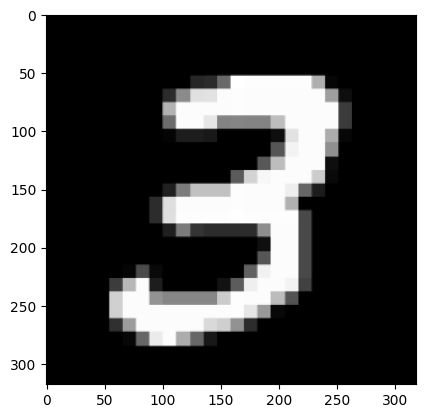

In [26]:
plt.imshow(input_image)

In [27]:
input_image.shape

(318, 318, 3)

In [28]:
#converting the image to greyscale image
greyscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [29]:
greyscale.shape

(318, 318)

In [30]:
# Resizing the input image to 28x28
resized_image=cv2.resize(greyscale,(28,28))

resized_image.shape

(28, 28)

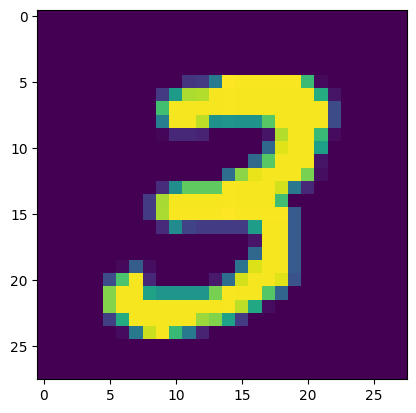

In [31]:
plt.imshow(resized_image)

In [32]:
resized_image=resized_image/255  # Normalizing the image

In [33]:
image_reshaped=np.reshape(resized_image, (1, 28, 28))

In [34]:
input_pred=model.predict(image_reshaped)

print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[2.9045630e-10 2.5040641e-01 5.5694227e-07 1.0000000e+00 5.7720348e-07
  8.8883895e-01 2.6623034e-21 2.9639088e-05 1.6086409e-03 9.9999678e-01]]


In [35]:
input_pred_label=np.argmax(input_pred)


print("The predicted label for the input image is:", input_pred_label)

The predicted label for the input image is: 3


PREDICTIVE SYSTEM

In [36]:
input_image=input("Enter Path Of Image:")

input_image=cv2.imread(input_image)

cv2.imshow("Input Image", input_image)
cv2.waitKey(0)

greyscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

resized_image=cv2.resize(greyscale,(28,28))

resized_image=resized_image/255

image_reshaped=np.reshape(resized_image, (1, 28, 28))

input_pred=model.predict(image_reshaped)
input_pred_label=np.argmax(input_pred)

print("The predicted label for the input image is:", input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The predicted label for the input image is: 7


In [38]:
import joblib

joblib.dump(model, 'digit_classifier.pkl')

['digit_classifier.pkl']